In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np

video_games = pd.read_csv('processed_video_games_data.csv')

In [2]:
video_games = video_games.drop("Name",axis=1)

In [3]:
m= len(video_games)
X = video_games.drop('Global_Sales', axis=1)
X["sum_of_Critic_Count_Critic_Score"] = X["Critic_Count"] + X["Critic_Score"]
X = X.drop("Critic_Count",axis=1)
X = X.drop("Critic_Score",axis=1)
X.drop("Name",axis=1)
y = video_games["Global_Sales"]

,Platform,Year_of_Release,Genre,Publisher,User_Score,User_Count,Developer,Rating,sum_of_Critic_Count_Critic_Score
0,Wii,2006.0,Sports,Nintendo,8.0,322.0,Nintendo,E,127.0
1,Wii,2008.0,Racing,Nintendo,8.3,709.0,Nintendo,E,155.0
2,Wii,2009.0,Sports,Nintendo,8.0,192.0,Nintendo,E,153.0
3,DS,2006.0,Platform,Nintendo,8.5,431.0,Nintendo,E,154.0
4,Wii,2006.0,Misc,Nintendo,6.6,129.0,Nintendo,E,99.0
...,...,...,...,...,...,...,...,...,...
6820,GBA,2001.0,Action,NewKidCo,2.4,21.0,Fluid Studios,E,50.0
6821,GBA,2002.0,Fighting,Midway Games,8.8,9.0,Criterion Games,M,93.0
6822,PC,2014.0,Action,Konami Digital Entertainment,7.6,412.0,Kojima Productions,M,100.0
6823,PC,2011.0,Shooter,Destineer,5.8,43.0,Atomic Games,T,73.0


In [5]:
max(y)

82.53

In [6]:
y

0       82.53
1       35.52
2       32.77
3       29.80
4       28.92
        ...  
6820     0.01
6821     0.01
6822     0.01
6823     0.01
6824     0.01
Name: Global_Sales, Length: 6825, dtype: float64

<Axes: >

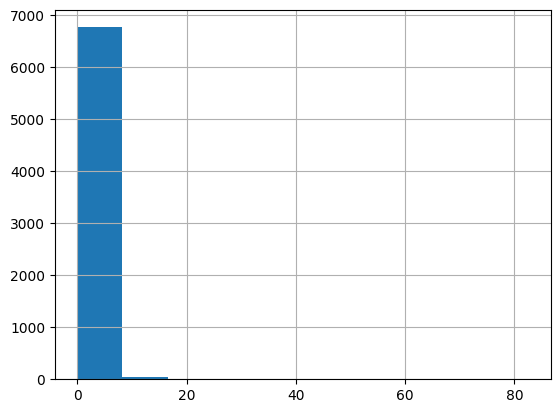

In [9]:
video_games["Global_Sales"].hist()

In [10]:
video_games["Global_Sales_cat"] = pd.cut(video_games["Global_Sales"], bins =[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,20,30,np.inf], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])

In [11]:
video_games["Global_Sales_cat"].value_counts()

Global_Sales_cat
1     1601
11    1267
2     1146
3      739
4      510
5      408
6      358
7      243
8      204
9      166
10     143
12      27
13      10
14       3
Name: count, dtype: int64

In [12]:
video_games["Global_Sales_cat"].hist

<bound method hist_series of 0       14
1       14
2       14
3       13
4       13
        ..
6820     1
6821     1
6822     1
6823     1
6824     1
Name: Global_Sales_cat, Length: 6825, dtype: category
Categories (14, int64): [1 < 2 < 3 < 4 ... 11 < 12 < 13 < 14]>

In [13]:
import sklearn

In [14]:
video_games_cat = X[['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']]
video_games_no_cat = X.drop(columns=['Platform', 'Genre', 'Publisher', 'Developer','Rating'])

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in sss.split(video_games, video_games["Global_Sales_cat"]):
        strat_train_set = video_games.loc[train_index]
        strat_test_set = X.loc[test_index]

    


In [16]:
video_games["Global_Sales_cat"].value_counts()

Global_Sales_cat
1     1601
11    1267
2     1146
3      739
4      510
5      408
6      358
7      243
8      204
9      166
10     143
12      27
13      10
14       3
Name: count, dtype: int64

In [17]:
strat_train_set

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales_cat
3156,PS3,2008.0,Sports,Electronic Arts,0.33,88.0,25.0,7.7,41.0,EA Canada,E10+,4
2163,X360,2008.0,Action,Sega,0.57,45.0,43.0,5.9,52.0,Secret Level,T,6
4310,PS3,2010.0,Adventure,Ubisoft,0.18,39.0,5.0,5.6,13.0,Telltale Games,M,2
4817,X360,2011.0,Adventure,Ubisoft,0.14,35.0,11.0,4.7,7.0,Ubisoft,T,2
357,PS2,2001.0,Sports,Electronic Arts,2.79,89.0,22.0,8.6,39.0,NuFX,E,11
...,...,...,...,...,...,...,...,...,...,...,...,...
524,X360,2011.0,Fighting,Warner Bros. Interactive Entertainment,2.10,86.0,66.0,8.3,382.0,NetherRealm Studios,M,11
939,X360,2006.0,Shooter,Capcom,1.34,79.0,76.0,7.1,187.0,Capcom,T,11
2810,Wii,2007.0,Shooter,Electronic Arts,0.41,73.0,37.0,7.6,82.0,EA Canada,T,5
3504,PS2,2002.0,Sports,Midway Games,0.28,76.0,22.0,8.9,15.0,Midway,E,3


In [18]:
strat_train_set

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales_cat
3156,PS3,2008.0,Sports,Electronic Arts,0.33,88.0,25.0,7.7,41.0,EA Canada,E10+,4
2163,X360,2008.0,Action,Sega,0.57,45.0,43.0,5.9,52.0,Secret Level,T,6
4310,PS3,2010.0,Adventure,Ubisoft,0.18,39.0,5.0,5.6,13.0,Telltale Games,M,2
4817,X360,2011.0,Adventure,Ubisoft,0.14,35.0,11.0,4.7,7.0,Ubisoft,T,2
357,PS2,2001.0,Sports,Electronic Arts,2.79,89.0,22.0,8.6,39.0,NuFX,E,11
...,...,...,...,...,...,...,...,...,...,...,...,...
524,X360,2011.0,Fighting,Warner Bros. Interactive Entertainment,2.10,86.0,66.0,8.3,382.0,NetherRealm Studios,M,11
939,X360,2006.0,Shooter,Capcom,1.34,79.0,76.0,7.1,187.0,Capcom,T,11
2810,Wii,2007.0,Shooter,Electronic Arts,0.41,73.0,37.0,7.6,82.0,EA Canada,T,5
3504,PS2,2002.0,Sports,Midway Games,0.28,76.0,22.0,8.9,15.0,Midway,E,3


In [39]:
strat_train_set

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,User_Score,User_Count,Developer,Rating,Global_Sales_cat,sum_of_Critic_Count_Critic_Score
3156,PS3,2008.0,Sports,Electronic Arts,0.33,7.7,41.0,EA Canada,E10+,4,113.0
2163,X360,2008.0,Action,Sega,0.57,5.9,52.0,Secret Level,T,6,88.0
4310,PS3,2010.0,Adventure,Ubisoft,0.18,5.6,13.0,Telltale Games,M,2,44.0
4817,X360,2011.0,Adventure,Ubisoft,0.14,4.7,7.0,Ubisoft,T,2,46.0
357,PS2,2001.0,Sports,Electronic Arts,2.79,8.6,39.0,NuFX,E,11,111.0
...,...,...,...,...,...,...,...,...,...,...,...
524,X360,2011.0,Fighting,Warner Bros. Interactive Entertainment,2.10,8.3,382.0,NetherRealm Studios,M,11,152.0
939,X360,2006.0,Shooter,Capcom,1.34,7.1,187.0,Capcom,T,11,155.0
2810,Wii,2007.0,Shooter,Electronic Arts,0.41,7.6,82.0,EA Canada,T,5,110.0
3504,PS2,2002.0,Sports,Midway Games,0.28,8.9,15.0,Midway,E,3,98.0


In [41]:
y_strat_training = strat_train_set["Global_Sales"]
X_strat_training = strat_train_set.drop(columns=["Global_Sales_cat","Global_Sales"])
X_strat_training["sum_of_Critic_Count_Critic_Score"] = strat_train_set["Critic_Count"] + strat_train_set["Critic_Score"]

In [42]:
y_strat_training

3156    0.33
2163    0.57
4310    0.18
4817    0.14
357     2.79
        ... 
524     2.10
939     1.34
2810    0.41
3504    0.28
5408    0.09
Name: Global_Sales, Length: 5460, dtype: float64

In [43]:
X_strat_training

,Platform,Year_of_Release,Genre,Publisher,User_Score,User_Count,Developer,Rating,sum_of_Critic_Count_Critic_Score
3156,PS3,2008.0,Sports,Electronic Arts,7.7,41.0,EA Canada,E10+,113.0
2163,X360,2008.0,Action,Sega,5.9,52.0,Secret Level,T,88.0
4310,PS3,2010.0,Adventure,Ubisoft,5.6,13.0,Telltale Games,M,44.0
4817,X360,2011.0,Adventure,Ubisoft,4.7,7.0,Ubisoft,T,46.0
357,PS2,2001.0,Sports,Electronic Arts,8.6,39.0,NuFX,E,111.0
...,...,...,...,...,...,...,...,...,...
524,X360,2011.0,Fighting,Warner Bros. Interactive Entertainment,8.3,382.0,NetherRealm Studios,M,152.0
939,X360,2006.0,Shooter,Capcom,7.1,187.0,Capcom,T,155.0
2810,Wii,2007.0,Shooter,Electronic Arts,7.6,82.0,EA Canada,T,110.0
3504,PS2,2002.0,Sports,Midway Games,8.9,15.0,Midway,E,98.0


## Pipelines

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

strat_train_set_num_tr = num_pipeline.fit_transform(video_games_no_cat)

In [23]:
strat_train_set_num_tr

array([[-0.34120096,  0.56560159,  0.25073424,  0.99964868],
       [ 0.13375245,  0.77395863,  0.90958605,  2.00660584],
       [ 0.37122915,  0.56560159,  0.02941451,  1.93468032],
       ...,
       [ 1.55861268,  0.28779221,  0.40395559,  0.02865428],
       [ 0.84618256, -0.96235002, -0.22425195, -0.94234012],
       [ 0.84618256,  0.00998282, -0.27532573, -0.97830287]])

In [24]:
from sklearn.compose import ColumnTransformer

In [25]:
from sklearn.preprocessing import OneHotEncoder


In [26]:
cat_encoder = OneHotEncoder(sparse=False)
video_games_cat_1hot = cat_encoder.fit_transform(video_games_cat)


/Users/tobiaspoulsen/Library/Caches/pypoetry/virtualenvs/tobias-0EhebG63-py3.9/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
video_games_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
X_strat_training

,Platform,Year_of_Release,Genre,Publisher,User_Score,User_Count,Developer,Rating,sum_of_Critic_Count_Critic_Score
3156,PS3,2008.0,Sports,Electronic Arts,7.7,41.0,EA Canada,E10+,113.0
2163,X360,2008.0,Action,Sega,5.9,52.0,Secret Level,T,88.0
4310,PS3,2010.0,Adventure,Ubisoft,5.6,13.0,Telltale Games,M,44.0
4817,X360,2011.0,Adventure,Ubisoft,4.7,7.0,Ubisoft,T,46.0
357,PS2,2001.0,Sports,Electronic Arts,8.6,39.0,NuFX,E,111.0
...,...,...,...,...,...,...,...,...,...
524,X360,2011.0,Fighting,Warner Bros. Interactive Entertainment,8.3,382.0,NetherRealm Studios,M,152.0
939,X360,2006.0,Shooter,Capcom,7.1,187.0,Capcom,T,155.0
2810,Wii,2007.0,Shooter,Electronic Arts,7.6,82.0,EA Canada,T,110.0
3504,PS2,2002.0,Sports,Midway Games,8.9,15.0,Midway,E,98.0


In [45]:
num_attribs = ['Year_of_Release','User_Score','User_Count','sum_of_Critic_Count_Critic_Score']
cat_attribs = [ 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [30]:
#strat_train_set.drop("Global_Sales_cat",axis=1)

In [31]:
#strat_train_set.drop("Global_Sales_cat",axis=1)

['Year_of_Release', 'User_Score', 'User_Count', 'sum_of_Critic_Count_Critic_Score']
['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']


In [34]:
strat_train_set

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,User_Score,User_Count,Developer,Rating,Global_Sales_cat,sum_of_Critic_Count_Critic_Score
3156,PS3,2008.0,Sports,Electronic Arts,0.33,7.7,41.0,EA Canada,E10+,4,113.0
2163,X360,2008.0,Action,Sega,0.57,5.9,52.0,Secret Level,T,6,88.0
4310,PS3,2010.0,Adventure,Ubisoft,0.18,5.6,13.0,Telltale Games,M,2,44.0
4817,X360,2011.0,Adventure,Ubisoft,0.14,4.7,7.0,Ubisoft,T,2,46.0
357,PS2,2001.0,Sports,Electronic Arts,2.79,8.6,39.0,NuFX,E,11,111.0
...,...,...,...,...,...,...,...,...,...,...,...
524,X360,2011.0,Fighting,Warner Bros. Interactive Entertainment,2.10,8.3,382.0,NetherRealm Studios,M,11,152.0
939,X360,2006.0,Shooter,Capcom,1.34,7.1,187.0,Capcom,T,11,155.0
2810,Wii,2007.0,Shooter,Electronic Arts,0.41,7.6,82.0,EA Canada,T,5,110.0
3504,PS2,2002.0,Sports,Midway Games,0.28,8.9,15.0,Midway,E,3,98.0


In [35]:
video_games_prepared = full_pipeline.fit_transform(strat_train_set)


In [36]:
video_games_prepared

<5460x1467 sparse matrix of type '<class 'numpy.float64'>'
	with 49140 stored elements in Compressed Sparse Row format>

In [37]:
video_games_prepared.shape

(5460, 1467)

## Select An training models

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(video_games_prepared, housing_labels)

LinearRegression()

In [49]:
X_strat_training

,Platform,Year_of_Release,Genre,Publisher,User_Score,User_Count,Developer,Rating,sum_of_Critic_Count_Critic_Score
3156,PS3,2008.0,Sports,Electronic Arts,7.7,41.0,EA Canada,E10+,113.0
2163,X360,2008.0,Action,Sega,5.9,52.0,Secret Level,T,88.0
4310,PS3,2010.0,Adventure,Ubisoft,5.6,13.0,Telltale Games,M,44.0
4817,X360,2011.0,Adventure,Ubisoft,4.7,7.0,Ubisoft,T,46.0
357,PS2,2001.0,Sports,Electronic Arts,8.6,39.0,NuFX,E,111.0
...,...,...,...,...,...,...,...,...,...
524,X360,2011.0,Fighting,Warner Bros. Interactive Entertainment,8.3,382.0,NetherRealm Studios,M,152.0
939,X360,2006.0,Shooter,Capcom,7.1,187.0,Capcom,T,155.0
2810,Wii,2007.0,Shooter,Electronic Arts,7.6,82.0,EA Canada,T,110.0
3504,PS2,2002.0,Sports,Midway Games,8.9,15.0,Midway,E,98.0


In [52]:
# let's try the full preprocessing pipeline on a few training instances
some_data = X_strat_training.iloc[:5]
some_labels = y_strat_training.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

AttributeError: iloc not found